## 01 Install dan Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 02 Data Acquisition


Data bersumber dari https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia. Data ini kemudian diambil dengan cara didownload langsung dari source sumbernya. Data berisikan Sentimen Tingkat Kepuasan Pengguna Penyedia Layanan Telekomunikasi Seluler Indonesia Pada Platform Twitter

In [2]:
!wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_cellular_service_provider.csv

--2022-10-06 15:34:49--  https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_cellular_service_provider.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31655 (31K) [text/plain]
Saving to: ‘dataset_tweet_sentiment_cellular_service_provider.csv’

dataset_tweet_senti 100%[===================>]  30.91K  --.-KB/s    in 0s      

2022-10-06 15:34:50 (142 MB/s) - ‘dataset_tweet_sentiment_cellular_service_provider.csv’ saved [31655/31655]



Data yang telah didownload, kemudian ditampilkan agar dapat dibaca. Dapat dilihat bahwa dataset terdiri dari tiga kolom, yaitu:

*   Id         : merujuk pada id tweet/komentar
*   Sentiment  : berisikan data kategori 2 kelas sentimen yaitu positif dan negatif) yang menandakan apakah tweet dalam bentuk teks tersebut menggambarkan opini bersifat positif atau negatif. 
*   Text Tweet : berisikan text tweet atau cuitan pengguna mengenai layanan telekomunikasi suleler di Indonesia

Dataset memiliki 300 baris data/ 300 tweet






In [3]:
data = pd.read_csv('dataset_tweet_sentiment_cellular_service_provider.csv')
data.head()

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          300 non-null    int64 
 1   Sentiment   300 non-null    object
 2   Text Tweet  300 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


In [5]:
print('Total Jumlah Cuitan:', data.shape[0], 'data\n')

Total Jumlah Cuitan: 300 data



Berdasarkan dataset yang telah dikumpulkan dari situs jejaring sosial Twitter terkait dengan sentimen masyarakat terhadap penyedia layanan seluler di Indonesia, distribusi sentimen masyarakat dapat dikelompokkan menjadi dua kelas yaitu positif dan negatif. Data dengan Sentimen positif berjumlah 139 sedangkan data dengan sentimen negatif berjumlah 161. Kedua kelas ini dapat digolongkan balanced karena jumlah dari masing-masing kelas tidak terpaut terlalu jauh

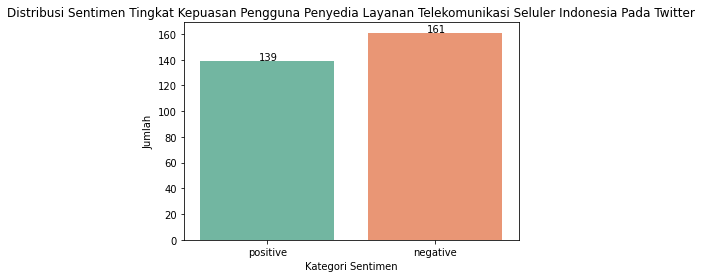

In [6]:
ax = sns.countplot(x='Sentiment', data=data, palette = "Set2")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.6))
plt.title('Distribusi Sentimen Tingkat Kepuasan Pengguna Penyedia Layanan Telekomunikasi Seluler Indonesia Pada Twitter')
plt.ylabel('Jumlah')
plt.xlabel('Kategori Sentimen')
plt.show()

## 03 Data PreProcessing


### Case Folding
Proses casefolding pada text akan melibatkan pengubahan teks menjadi lower case, menghapus angka menggunakan regex yang sudah ditetapkan, menghapus karakter tanda baca menggunakan regex yang sudah ditetapkan, dan menghapus whitespace.

In [7]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespace
  return text

### Word Normalization
Proses word normalization digunakan untuk mengganti kata-kata slang/singkatan dari data tweet menjadi data yang sesuai dengan norma kaidah bahasa Indonesia (dataset berisikan text dalam bahasa Indonesia). Proses ini menggunakan bantuan dari data csv github https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv yang didalamnya terdapat penulisan bahasa slang dan konversinya ke bahasa Indonesia yang baik dan benar.

In [8]:
# Download corpus kumpulan slangwords
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-10-06 15:34:50--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.001s  

2022-10-06 15:34:50 (60.7 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [9]:
key_norm = pd.read_csv('key_norm.csv')
key_norm.head()

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi


In [10]:
# Buat fungsi untuk langkah normalisasi text
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

### Filtering
Proses filtering melibatkan pemilihan kata-kata penting atau kata-kata apa saja yang di gunakan untuk mewakili dokumen. Dalam prosesnya, digunakan penghapusan stopwords berdasarkan corpus Indonesia milik library nltk. Kemudian, juga ditambahkan beberapa kata: 'url', 'provider_name', 'user_mention', 'product_name', 'boikot_provider_name', 'boikotprovider_name' pada corpus stopword karena kata tersebut dianggap tidak penting dan belum ada pada corpus stopword ntlk.

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
more_stopword = ['url', 'provider_name', 'user_mention', 'product_name', 'boikot_provider_name', 'boikotprovider_name']                    # Tambahkan kata lain dalam daftar stopword

stopwords_ind = stopwords_ind + more_stopword

# Buat fungsi untuk langkah filtering stopword
def remove_stopwords(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return ' '.join(clean_words)

### Stemming
Proses stemming melibatkan proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Dalam implementasinya, karena dataset berupa text Bahasa Indonesia, maka digunakan bantuan library Sastrawi. Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya. 

In [13]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 26.7 MB/s 


In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [15]:
# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

### Pipeline PreProcessing
Masing-masing proses PreProcessing yang telah dibuatkan fungsinya diatas, kemudian diterapkan pada text tweet pada dataset secara berurut:
1.   Text Normalize
2.   Casefolding
3.   Filtering (remove Stopwords)
4.   Stemming 

Hasil preprocessing data kemudian akan disimpan dalam dataframe yang kita gunakan diawal.



In [16]:
def text_preprocessing_process(text):
  text = text_normalize(text)
  text = casefolding(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [17]:
%%time
data['clean_teks'] = data['Text Tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 44.5 s, sys: 182 ms, total: 44.7 s
Wall time: 50.4 s


Untuk tahapan preprocessing text, dibutuhkan waktu total sekitar 44.2 s

In [18]:
data.head(10)

,Id,Sentiment,Text Tweet,clean_teks
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,produk bangsa
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah v
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bantu kamar sinyal g hilang pangg...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear jaring data lot banget h
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta
5,6,negative,Untuk penembakan paket dari <PRODUCT_NAME> mas...,tembak paket ganggu ya
6,7,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...",pakai paket nya off ganti paket gratis youtube...
7,8,negative,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...,rt kamus perhapean
8,9,negative,keluhan gak ditanggapi. bikin emosi aja. pulsa...,keluh tanggap bikin emosi aja pulsa curi soak ...
9,10,negative,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...,bilboard iklan pesan sembunyi ramadhan


### Pengkodean Data Label
Apabila dilihat pada kolom Sentiment, data masih berbentuk String dengan dua nilai yaitu `positive` dan `negative`. Agar dapat diproses untuk machine learning, data string harus dikonversikan ke bentuk numerik. Hasilnya nilai `0` mewakili data `negative` dan nilai `1` mewakili data `positive`.

In [68]:
data['Sentiment'] = data['Sentiment'].replace({'positive':'1', 'negative': '0'}).astype(int)
data

,Id,Sentiment,Text Tweet,clean_teks
0,1,1,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,produk bangsa
1,2,1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah v
2,3,0,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bantu kamar sinyal g hilang pangg...
3,4,0,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear jaring data lot banget h
4,5,0,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta
...,...,...,...,...
295,296,1,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...",pantesan lancar ya sinyal g lancar lombok timur
296,297,1,Alhamdulillah lancar pakai <PROVIDER_NAME>,alhamdulillah lancar pakai
297,298,1,"Untung pakai internet <PROVIDER_NAME>, lancar,...",untung pakai internet lancar ide
298,299,1,"di tempat ramai seperti di lokasi wisata, <PRO...",ramai lokasi wisata jaya


## 03 Feature Engineering

In [20]:
# Pisahkan kolom fitur(X) dan target(y)
X = data['clean_teks']
y = data['Sentiment']

### Feature Extraction
Mengubah data text menjadi vektor agar mudah dipahami oleh komputer. Pada tahapan ini, digunakan TF-IDF. TF-IDF biasa digunakan ketika kita ingin mengubah data teks menjadi vektor namun dengan memperhatikan apakah sebuah kata tersebut cukup informatif atau tidak. Mudahnya, TF-IDF membuat kata yang sering muncul memiliki nilai yang cenderung kecil, sedangkan untuk kata yang semakin jarang muncul akan memiliki nilai yang cenderung besar.

TF-IDFVectorizer akan mengubah kumpulan dokumen mentah menjadi matriks feature TF-IDF.Proses pengubahan melibatkan parameter ngram_range. Parameter ini berguna dalam menentukan jumlah kombinasi kata-kata dari kata-kata yang ditokenisasi. Dalam tugas ini, jumlah kombinasinya adalah (1,3)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,3))
tf_idf.fit(X)

TfidfVectorizer(ngram_range=(1, 3))

Hasilnya, didapatkan 2959 fitur dalam corpus

In [22]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

2959


In [23]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['acara' 'acara live' 'acara live streaming' ... 'yuk pakai rp' 'zalim'
 'zalim ya']


In [24]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# Melihat matriks jumlah token menggunakan TF IDF
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,acara,acara live,acara live streaming,aceh,aceh singkil,aceh singkil stabil,adhan,adhan styles,adhan styles mekah,aja,...,youtube top deh,youtubenya,youtubenya pakai,youtubenya pakai jam,youtubeyondergenflix,yuk,yuk pakai,yuk pakai rp,zalim,zalim ya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DataFrame diatas menampilkan nama fitur dan jumlah token menggunakan TFIDF. Fitur-fitur yang telah didapatkan, akan disimpan dalam file dengan ditulis dalam pengkodean binary.

In [26]:
#store tf_idf_feature object data to file and write in binary
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

### Feature Selection
Sebelumnya, pada feature extraction telah didapatkan bahwa dalam corpus terdapat 2959 fitur. Tidak harus semua fitur digunakan dalam pemodelan machine learning kita. Untuk itu, dipilihlah beberapa fitur terbaik yang fitur tsb dianggap memiliki pengaruh kuat dalam melakukan analisis sentimen. Dalam tugas ini, dari 2959 fitur, diambil 1200 fitur terbaik.

In [27]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [28]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# 1200 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1200) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 2959
Reduced feature number: 1200


In [29]:
# melihat nilai chi2 dari masing-masing fitur
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2['fitur'] = tf_idf.get_feature_names_out()
data_chi2

,nilai,fitur
0,0.184020,acara
1,0.184020,acara live
2,0.184020,acara live streaming
3,0.235706,aceh
4,0.235706,aceh singkil
...,...,...
2954,0.374146,yuk
2955,0.374146,yuk pakai
2956,0.374146,yuk pakai rp
2957,0.555567,zalim


In [30]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
2706,4.519285,terimakasih
737,3.936005,gratis
1395,3.641538,lancar
1494,2.904204,lot
1597,2.769341,mantap
...,...,...
32,0.000334,aktif
890,0.000285,hujan
1444,0.000115,layan
2117,0.000089,ping


Selanjutnya, akan ditampilkan mask pada fitur yang akan diseleksi. Mask yang bernilai false menandakan bahwa fitur tidak akan dipilih dan True menandakan fitur tersebut akan dipilih (digunakan).

In [31]:
mask = chi2_features.get_support()
mask

array([False, False, False, ...,  True,  True,  True])

In [32]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, tf_idf.get_feature_names_out()):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['ajaib min',
 'ajaib min kartu',
 'ajar pakai',
 'ajar pakai produk',
 'aksi',
 'aksi pakai',
 'aksi pakai bagus',
 'alhamdulilah',
 'alhamdulilah kunjung',
 'alhamdulilah kunjung vendor',
 'alhamdulillah',
 'alhamdulillah beres',
 'alhamdulillah beres pakai',
 'alhamdulillah gratis',
 'alhamdulillah gratis youtube',
 'alhamdulillah kencang',
 'alhamdulillah kencang kota',
 'alhamdulillah kuota',
 'alhamdulillah kuota murah',
 'alhamdulillah lancar',
 'alhamdulillah lancar pakai',
 'alhamdulillah manfaat',
 'alhamdulillah manfaat sinyal',
 'alhamdulillah pakai',
 'alhamdulillah setia',
 'alhamdulillah setia baik',
 'alhamdulillah urus',
 'alhamdulillah urus beres',
 'allah',
 'allah paket',
 'allah paket kuota',
 'aman capture',
 'aman capture kuotaaman',
 'amsyong',
 'amsyong stadion',
 'amsyong stadion gajayana',
 'anak',
 'and speed irit',
 'andal',
 'anjing',
 'anjir',
 'anjir banget',
 'area tarogong',
 'area tarogong garut',
 'asik',
 'asik kencang',
 'ayo buang',
 'ayo buang ka

Selanjutnya, dapat dilihat vocab yang termasuk dalam best fitur terpilih

In [33]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [34]:
kbest_feature

{'bangsa': 205,
 'produk bangsa': 2151,
 'sakti': 2335,
 'alhamdulillah': 46,
 'sakti alhamdulillah': 2336,
 'selamat': 2374,
 'sinyal': 2464,
 'hilang': 851,
 'sinyal hilang': 2477,
 'dear': 540,
 'jaring': 1008,
 'data': 515,
 'lot': 1494,
 'dear jaring': 541,
 'jaring data': 1018,
 'data lot': 532,
 'lot banget': 1495,
 'dear jaring data': 542,
 'jaring data lot': 1019,
 'data lot banget': 533,
 'dusta': 585,
 'selamat malam': 2377,
 'malam dusta': 1569,
 'selamat malam dusta': 2378,
 'tembak': 2697,
 'ganggu': 663,
 'ya': 2903,
 'tembak paket': 2698,
 'paket ganggu': 2033,
 'ganggu ya': 674,
 'tembak paket ganggu': 2699,
 'paket ganggu ya': 2034,
 'nya': 1871,
 'gratis': 737,
 'youtube': 2926,
 'senang': 2395,
 'pakai paket': 1995,
 'ganti paket': 679,
 'gratis youtube': 762,
 'rt': 2293,
 'kamus': 1143,
 'perhapean': 2097,
 'rt kamus': 2298,
 'kamus perhapean': 1144,
 'rt kamus perhapean': 2299,
 'tanggap': 2638,
 'bikin': 299,
 'pulsa': 2213,
 'kurang': 1372,
 'pulsa kurang': 221

In [35]:
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,ajaib min,ajaib min kartu,ajar pakai,ajar pakai produk,aksi,aksi pakai,aksi pakai bagus,alhamdulilah,alhamdulilah kunjung,alhamdulilah kunjung vendor,...,youtube lancar banget,youtube ramadhan,youtube ramadhan faedah,youtube tahun,youtube tahun kuota,yuk,yuk pakai,yuk pakai rp,zalim,zalim ya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DataFrame diatas menampilkan nama fitur dan jumlah token menggunakan TFIDF yang dimana telah melewati proses seleksi fitur. Fitur-fitur yang muncul diatas hanyalah 1200 fitur terbaik berdasarkan nilai chi2, Kemudian, hasil fitur  yang terbaik ini akan disimpan dalam file dengan ditulis dalam pengkodean binary.

In [36]:
#store kbest_feature object data to file and write in binary
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

## 04 Modelling

### Split Dataset
Dataset akan dibagi menjadi data train dan data test dengan perbandingan 70:30 dengan random state 123

In [37]:
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.3, random_state=123)

### Model 1: Algoritma Naive Bayes

Algoritma pertama yang digunakan adalah Gaussian Naive Bayes. 

In [38]:
from sklearn.naive_bayes import GaussianNB              # Algoritma Gaussioan Naive Bayes
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

In [39]:
# Latih model
naive_bayes = GaussianNB()                              # Load algoritma pembelajaran
model_nb = naive_bayes.fit(X_train, y_train)            # Latih algoritma pada data latih & label latih

# Simpan model hasil traning
dump(model_nb, filename='model_nb.joblib')

['model_nb.joblib']

In [40]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_nb_pred = model_nb.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_nb_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0])

### Model 2: Algoritma Support Vector Machine

Algoritma kedua yang digunakan adalah Support Vector Machine untuk Classifier. Pada SVC ini, digunakan parameter random awal yaitu nilai C=0.0001, kernel=polinomial, degree=2, dan max_iteration = 50. 

In [41]:
from sklearn.svm import SVC                                                        # Algoritma Support Vector Machine untuk Classification, yaitu Support Vector Classifier

In [42]:
#Latih Model
svc = SVC(C=0.0001, kernel='poly', degree=2, max_iter=50)                          # Load algoritma pembelajaran
model_svc = svc.fit(X_train, y_train)                                              # Latih algoritma pada data latih & label latih

# Simpan model hasil traning
dump(model_svc, filename='model_svc.joblib')

['model_svc.joblib']

In [43]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_svc_pred = model_svc.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_svc_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1])

## 05 Model Evaluation
Evaluasi model 1 dan model 2 dilakukan dengan melihat confusion matrix dan classification report masing-masing model

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

### Model 1 : Algoritma Naive Bayes

In [45]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
pred_nb_true = (model_nb_pred == y_test).sum()
pred_nb_false = (model_nb_pred != y_test).sum()

print('Evaluasi Model 1: Algoritma Naive Bayes')
print('Jumlah prediksi benar\t:', pred_nb_true)
print('Jumlah prediksi salah\t:', pred_nb_false)

accuracy_nb = pred_nb_true / (pred_nb_true + pred_nb_false)*100
print('Akurasi pengujian model 1\t:', accuracy_nb, '%')

Evaluasi Model 1: Algoritma Naive Bayes
Jumlah prediksi benar	: 80
Jumlah prediksi salah	: 10
Akurasi pengujian model 1	: 88.88888888888889 %


In [46]:
cm_nb = confusion_matrix(y_test, model_nb_pred)
print('Confusion Matrix Model 1:\n', cm_nb)

Confusion Matrix Model 1:
 [[55  2]
 [ 8 25]]


In [47]:
print('Classification report Model 1:\n', classification_report(y_test, model_nb_pred))

Classification report Model 1:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92        57
           1       0.93      0.76      0.83        33

    accuracy                           0.89        90
   macro avg       0.90      0.86      0.88        90
weighted avg       0.89      0.89      0.89        90



Hasil akurasi awal pada model 1 yaitu 89% dengan jumlah prediksi benar sebanyak 80 data dan prediksi yang salah 10 data.

### Model 2 : Algoritma Support Vector Machine

In [48]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
pred_svc_true = (model_svc_pred == y_test).sum()
pred_svc_false = (model_svc_pred != y_test).sum()

print('Evaluasi Model 2: Algoritma Support Vector Machine')
print('Jumlah prediksi benar\t:', pred_svc_true)
print('Jumlah prediksi salah\t:', pred_svc_false)

accuracy_svc = pred_svc_true / (pred_svc_true + pred_svc_false)*100
print('Akurasi pengujian model 2\t:', accuracy_svc, '%')

Evaluasi Model 2: Algoritma Support Vector Machine
Jumlah prediksi benar	: 47
Jumlah prediksi salah	: 43
Akurasi pengujian model 2	: 52.22222222222223 %


In [49]:
cm_svc = confusion_matrix(y_test, model_svc_pred)
print('Confusion Matrix Model 2:\n', cm_svc)

Confusion Matrix Model 2:
 [[14 43]
 [ 0 33]]


In [50]:
print('Classification report Model 2:\n', classification_report(y_test, model_svc_pred))

Classification report Model 2:
               precision    recall  f1-score   support

           0       1.00      0.25      0.39        57
           1       0.43      1.00      0.61        33

    accuracy                           0.52        90
   macro avg       0.72      0.62      0.50        90
weighted avg       0.79      0.52      0.47        90



Hasil akurasi awal pada model 2 yaitu 52% dengan jumlah prediksi benar sebanyak 47 data dan prediksi yang salah 43 data.

## Hyperparameter Tuning for Model
Dikarenakan nilai akurasi model masih cukup rendah, perlu hyperparameter tuning pada masing-masing model. Tuning menggunakan GridSearchCV.

### Model 1 : Algoritma Naive Bayes


In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# mendefinisikan tipe Cross Validation yang akan digunakan.
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

Parameter Var_smoothing (Variance smoothing) menentukan porsi varians terbesar dari semua fitur yang akan ditambahkan ke varians untuk stabilitas perhitungan.

Gaussian Naive Bayes mengasumsikan bahwa fitur mengikuti distribusi normal yang paling tidak mungkin terjadi di dunia nyata. Jadi memecahkan masalah ini kita dapat melakukan "PowerTransformer" pada setiap fitur untuk membuatnya lebih atau kurang terdistribusi normal. Secara default, PowerTransformer menghasilkan fitur yang memiliki rata-rata 0 dan deviasi standar 1.

In [53]:
from sklearn.preprocessing import PowerTransformer

# menentukan nilai var_smoothin, yaitu dengan membuat array dengan nilai log Base10 dalam interval 0, -9 num=100
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# membangun model GaussianNB berdasarkan parameter yang telah ditentukan terbaik dengan gridsearchcv
model_nb_grid = GridSearchCV(estimator=model_nb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

#transformasi data dengan power transformator
Data_transformed = PowerTransformer().fit_transform(X_test)

# melatih model
model_nb_grid.fit(Data_transformed, y_test)

# Simpan model hasil traning
dump(model_nb_grid, filename='model_nb.joblib')

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


['model_nb.joblib']

In [54]:
print("Best param: ", model_nb_grid.best_params_)
print("Best score: ", model_nb_grid.best_score_)

Best param:  {'var_smoothing': 0.0533669923120631}
Best score:  0.8555555555555557


Didapatkan bahwa nilai parameter terbaik dari model GaussianNB untuk var smoothing adalah 0.0533669923120631 dengan hasil score 0.85

In [55]:
# melakukan prediksi berdasarkan model GaussianNB yang telah di tuning dan dibangun
model_nb_grid_pred = model_nb_grid.predict(Data_transformed)

Evaluasi model 1 setelah di tuning menggunakan confussion matrix dan calssification report.

Hasilnya, model 1 memiliki akurasi 97.7 atau dapat dibulatkan menjadi 98% dengan jumlah prediksi yang benar 88 data dan prediksi yang salah 2 data.

In [56]:
pred_nb_true = (model_nb_grid_pred == y_test).sum()
pred_nb_false = (model_nb_grid_pred != y_test).sum()

print('Evaluasi Model 1: Algoritma Naive Bayes')
print('Jumlah prediksi benar\t:', pred_nb_true)
print('Jumlah prediksi salah\t:', pred_nb_false)

accuracy_nb = pred_nb_true / (pred_nb_true + pred_nb_false)*100
print('Akurasi pengujian model 1\t:', accuracy_nb, '%')

Evaluasi Model 1: Algoritma Naive Bayes
Jumlah prediksi benar	: 88
Jumlah prediksi salah	: 2
Akurasi pengujian model 1	: 97.77777777777777 %


In [57]:
print('Classification report Model 1 Setelah Di Tuning:\n', classification_report(y_test, model_nb_grid_pred))

Classification report Model 1 Setelah Di Tuning:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.94      0.97        33

    accuracy                           0.98        90
   macro avg       0.98      0.97      0.98        90
weighted avg       0.98      0.98      0.98        90



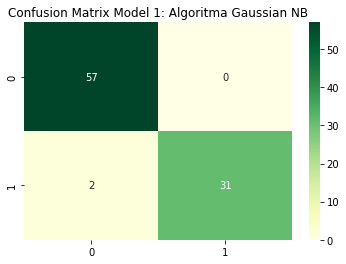

In [58]:
cm_nb = confusion_matrix(y_test, model_nb_grid_pred)
sns.heatmap((cm_nb),annot=True,fmt='.5g',cmap="YlGn").set_title('Confusion Matrix Model 1: Algoritma Gaussian NB');

### Model 2 : Algoritma Support Vector Machine

Untuk tuning pada SVM, diketahui bahwa tuning parameter C, Gamma, dan kernel dapat mempengaruhi akurasi model. Untuk itu, ditentukan terlebih dahulu paremeter yang akan dicobakan pada model untuk mencari model terbaik.

In [59]:
# menentukan parameter untuk menentukan parameter pembuatan model svc terbaik
param_SVC = {
    "gamma": [0.1, 1.0, 10, 100],
    "C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
    "kernel": ['linear', 'poly'],
    "max_iter" : [50]
}

In [60]:
# Latih Model
svc_grid = GridSearchCV(SVC(), param_SVC, verbose=1, cv=cv_method)                # Load algoritma pembelajaran
model_svc_grid = svc_grid.fit(X_train, y_train)                                   # Latih algoritma pada data latih & label latih

# Simpan model hasil traning
dump(model_svc_grid, filename='model_svc.joblib')

Fitting 15 folds for each of 56 candidates, totalling 840 fits


['model_svc.joblib']

In [61]:
print("Best param: ", model_svc_grid.best_params_)
print("Best score: ", model_svc_grid.best_score_)

Best param:  {'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': 50}
Best score:  0.8380952380952382


Didapatkan bahwa nilai parameter terbaik dari model SVC adalah {'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': 50} dengan score terbaik 0.83

In [62]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_svc_grid_pred = model_svc_grid.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_svc_grid_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0])

Evaluasi model 2 setelah di tuning menggunakan confussion matrix dan calssification report.

Hasilnya, model 2 memiliki akurasi 78.8 atau dapat dibulatkan menjadi 79% dengan jumlah prediksi yang benar 71 data dan prediksi yang salah 19 data.

In [63]:
pred_svc_true = (model_svc_grid_pred == y_test).sum()
pred_svc_false = (model_svc_grid_pred != y_test).sum()

print('Evaluasi Model 2: Algoritma Support Vector Machine')
print('Jumlah prediksi benar\t:', pred_svc_true)
print('Jumlah prediksi salah\t:', pred_svc_false)

accuracy_svc = pred_svc_true / (pred_svc_true + pred_svc_false)*100
print('Akurasi pengujian model 2\t:', accuracy_svc, '%')

Evaluasi Model 2: Algoritma Support Vector Machine
Jumlah prediksi benar	: 71
Jumlah prediksi salah	: 19
Akurasi pengujian model 2	: 78.88888888888889 %


In [64]:
print('Classification report Model 2 Setelah Di Tuning:\n', classification_report(y_test, model_svc_grid_pred))

Classification report Model 2 Setelah Di Tuning:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81        57
           1       0.65      0.94      0.77        33

    accuracy                           0.79        90
   macro avg       0.80      0.82      0.79        90
weighted avg       0.84      0.79      0.79        90



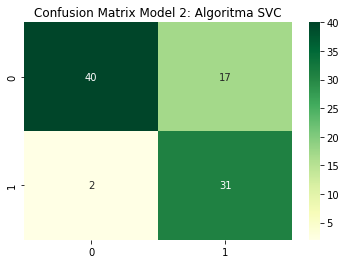

In [65]:
cm_svc = confusion_matrix(y_test, model_svc_grid_pred)
sns.heatmap((cm_svc),annot=True,fmt='.5g',cmap="YlGn").set_title('Confusion Matrix Model 2: Algoritma SVC');

Dari kedua model diatas dapat diketahui bahwa model GaussianNB memiliki akurasi yang lebih baik yaitu 98% daripada model SVC yaitu 79%. 

### 06 Deployment

Setelah mengetahui bahwa model GaussianNB lebih baik, maka untuk proses deployment sederhana, akan digunakanlah model ini. Deployment ini akan digunakan untuk mengidentifikasi Sentimen (positif atau negatif) Tingkat Kepuasan Pengguna Penyedia Layanan Telekomunikasi Seluler Indonesia berdasarkan text/tweet yang dilontarkan pengguna.

Menggunakan model GaussianNB dan vocabulary dari TFIDF untuk menentukan sentiment

In [66]:
from joblib import load

# load model
model = load('model_svc.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [67]:
#@title Masukkan Teks Anda:
input_text = "Ih dan 4G sinyal terlkomsel jelek banget kzl loh dirumah aq" #@param {type:"string"}

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]).toarray())  # Lakukan prediksi

if (result==0):
  sentiment = 'Negative'
else :
  sentiment = 'Positif'

print('Hasil analisis sentimen dari teks "', str(input_text),'" adalah\n', sentiment)

Hasil analisis sentimen dari teks " Ih dan 4G sinyal terlkomsel jelek banget kzl loh dirumah aq " adalah
 Negative
